In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Gradient descent

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
import tensorflow as tf

## Do train test split to make your data out of sample to test

array([[<Axes: title={'center': 'Experience Years'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

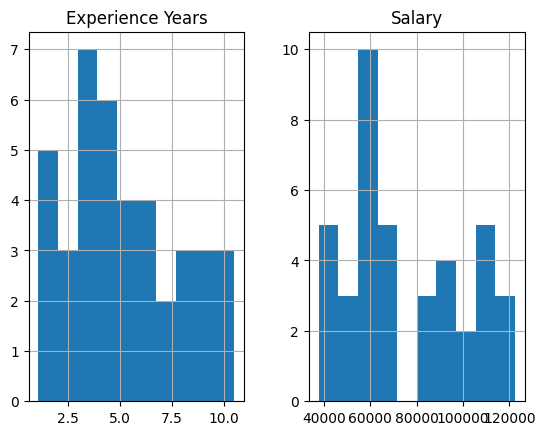

In [58]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
X = salary['Experience Years']
y = salary['Salary']

salary.hist()

In [30]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

10.5

## Always scale your data

In [36]:
X_train_scaled = X_train.copy() 
X_train_scaled = X_train_scaled / 10.5
X_test_scaled = X_train.copy() 
X_test_scaled /= 10.5  

39    10.5
6      2.5
25     5.9
9      3.2
13     3.8
Name: Experience Years, dtype: float64

## Create a model to learn this pattern



In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,), activation='sigmoid', bias_initializer='zeros')
])

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
X_train_scaled[:8].shape, y_train.shape

model.fit(X_train_scaled[:8], y_train, epochs=400)

In [52]:
model.evaluate(X_test_scaled[:8], y_test)
pred = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: -18966.1895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


### To know what is the weight and bias

In [ ]:
coef, intercept = model.get_weights()
coef, intercept

# Creating my own neuron


In [14]:
import math

def sigmoid(x):
    return (1 / (1 + math.exp(-x)))
sigmoid(18)

0.9999999847700205

In [15]:
def prediction_fun(column1, column2):
    weighted_sum = coef[0]*column1 + coef[1]*column2 + intercept
    return sigmoid(weighted_sum)

In [ ]:
prediction_fun(47, 1)

### This will take an array of input to activation sigmoid function

In [57]:
def sigmoid_numpy(x):
    return 1 / (1+np.exp(-x))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred_new = [max(i, epsilon) for i in y_pred]
    y_pred_new = [min(i, 1-epsilon) for i in y_pred_new]
    y_pred_new = np.array(y_pred_new)
    return -np.mean(y_true*np.log(y_pred_new)+(1-y_true)*np.log(1-y_pred_new))

### Function to create gradient descent

In [ ]:
def gradient_descent(column1,column2, y_true, epochs):
    # w1, w2, bias
    w1 = w2 = 1
    bias = 0
    lr = 0.5
    n = len(column1)

    for i in range(epochs):
        weighted_sum = column + w2 * columns2 + bias # weighted sum
        y_predicted = sigmoid_numpy(weighted_sum) # Activation function
        loss = log_loss(y_true, y_pred)) # loss

        # Calculating derivatives
        w1d = (1/n)*np.dot((np.transpose(colulmn1, y_pred - y_true)))
        w2d = (1/n)*np.dot((np.transpose(column2, y_pred - y_true)))

        bias_d = np.mean(y_pred - y_true)

        w1 = w1 - rate * w1d
        w1 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

return w1, w2, bias

In [ ]:
gradient_descent(X_train_scaled['column1'], X_train_scaled['column2'], y_train, 1000)

### If you have a loss threshold, after which the fuction will break

In [ ]:
def gradient_descent(column1,column2, y_true, epochs, loss_threshold):
    # w1, w2, bias
    w1 = w2 = 1
    bias = 0
    lr = 0.5
    n = len(column1)

    for i in range(epochs):
        weighted_sum = column + w2 * columns2 + bias # weighted sum
        y_predicted = sigmoid_numpy(weighted_sum) # Activation function
        loss = log_loss(y_true, y_pred)) # loss

        # Calculating derivatives
        w1d = (1/n)*np.dot((np.transpose(colulmn1, y_pred - y_true)))
        w2d = (1/n)*np.dot((np.transpose(column2, y_pred - y_true)))

        bias_d = np.mean(y_pred - y_true)

        w1 = w1 - rate * w1d
        w1 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss <= loss_threshold:
            break

return w1, w2, bias

In [ ]:
gradient_descent(X_train_scaled['column1'], X_train_scaled['column2'], y_train, 1000, 0.4631)